# Ecommerce Customer Churn Analysis and Prediction 

Este projeto tem como objetivo realizar uma análise exploratória de um dataset público com dados simulados relacionado a uma plataforma de e-commerce. Inicialmente, foi feito o processo de limpeza, tratamento e compreensão das variáveis presentes no conjunto de dados. No entanto, a análise não se limita à etapa exploratória. 


O dataset também está sendo utilizado como base para o desenvolvimento de um modelo de Machine Learning de classificação, cujo propósito é prever se um determinado usuário está propenso a realizar churn (abandono da plataforma) ou não. A variável-alvo (churn) é analisada em relação às demais variáveis preditoras para entender quais atributos mais impactam na decisão do modelo.

# 📚 Bibliotecas

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

#  📁 Coleta

In [50]:
df = pd.read_excel("E+commerce+Dataset.xlsx", sheet_name = "E Comm")

In [51]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# 🎲 Divisão de dados de treino e teste

In [53]:
x = df.loc[:, ~df.columns.isin(['Churn', 'CustomerID'])]
y = df[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train = x_train.merge(y_train, left_index=True, right_index=True)
test = x_test.merge(y_test, left_index=True, right_index=True)

# 📊 Análise Exploratória e Limpeza dos Dados

In [55]:
x_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5225,29.0,Mobile Phone,1,11.0,Debit Card,Male,2.0,4,Laptop & Accessory,3,Married,2,1,17.0,2.0,2.0,3.0,165.35
1658,6.0,Computer,1,11.0,Debit Card,Female,3.0,3,Fashion,4,Married,7,0,11.0,7.0,8.0,NaN,218.78
204,20.0,Mobile Phone,1,11.0,Debit Card,Male,2.0,3,Others,3,Divorced,5,0,11.0,NaN,1.0,1.0,283.00
21,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,2,Divorced,2,0,12.0,11.0,15.0,6.0,203.12
2369,20.0,Mobile Phone,1,8.0,Credit Card,Female,2.0,3,Grocery,3,Married,4,0,19.0,NaN,5.0,6.0,271.69


In [56]:
x_train.shape

(4504, 18)

In [57]:
# Verificar tipos dos dados

pd.DataFrame({'train': x_train.dtypes, 'test': x_test.dtypes})

,train,test
Tenure,float64,float64
PreferredLoginDevice,object,object
CityTier,int64,int64
WarehouseToHome,float64,float64
PreferredPaymentMode,object,object
Gender,object,object
HourSpendOnApp,float64,float64
NumberOfDeviceRegistered,int64,int64
PreferedOrderCat,object,object
SatisfactionScore,int64,int64


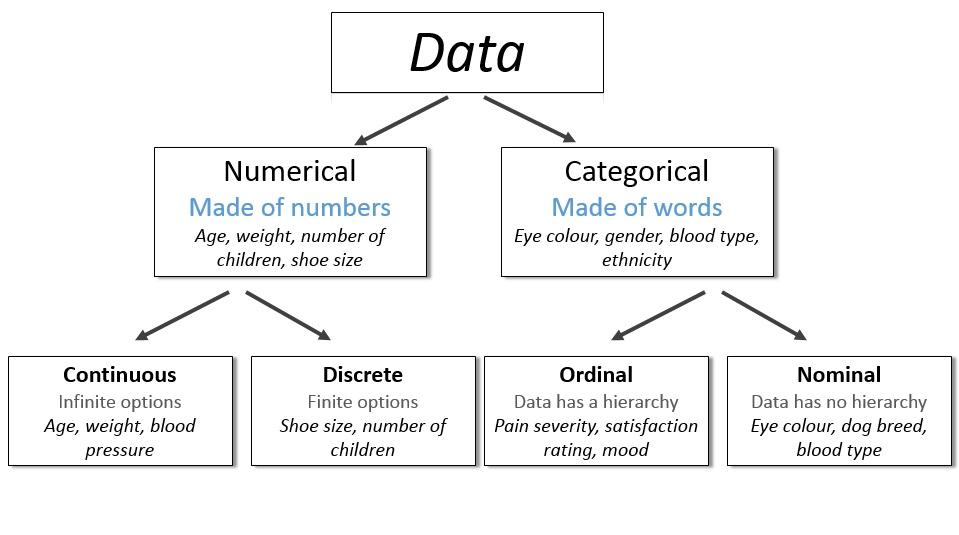

In [58]:
Image('image.png')

In [59]:
# Verificar colunas com dados nulos

pd.DataFrame({'train': round(100*(x_train.isnull().sum()/x_train.count()), 2), 
              'test': round(100*(x_test.isnull().sum()/x_test.count()), 2)})

,train,test
Tenure,4.84,5.23
PreferredLoginDevice,0.00,0.00
CityTier,0.00,0.00
WarehouseToHome,4.74,4.36
PreferredPaymentMode,0.00,0.00
Gender,0.00,0.00
HourSpendOnApp,4.65,5.14
NumberOfDeviceRegistered,0.00,0.00
PreferedOrderCat,0.00,0.00
SatisfactionScore,0.00,0.00


# 📉 Churn

## Variável Target

In [61]:
y_train["Churn"].isnull().sum(), y_test["Churn"].isnull().sum()

(0, 0)

In [62]:
y_train["Churn"].value_counts()

Churn
0    3751
1     753
Name: count, dtype: int64

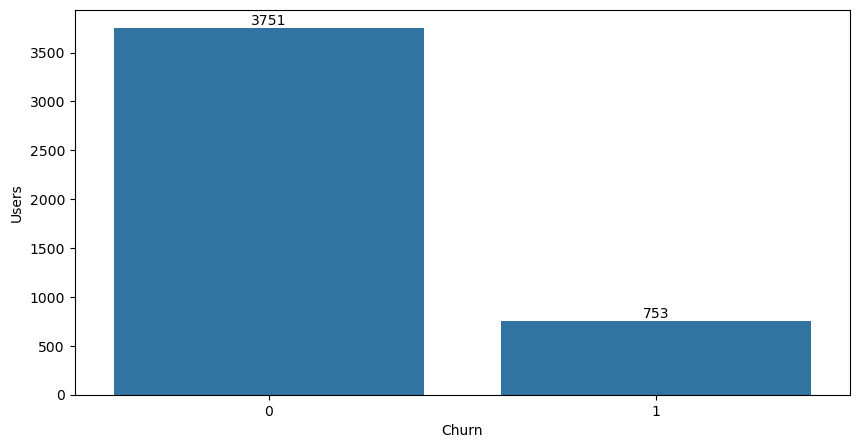

In [63]:
# Cria uma nova figura com tamanho definido
plt.figure(figsize=(10, 5))

# Cria o gráfico de contagem usando y_train
ax = sns.countplot(data=y_train, x="Churn")

# Adiciona os números em cima de cada barra
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',                     # Texto: altura da barra
        (p.get_x() + p.get_width() / 2, p.get_height()), # Posição: meio da barra, altura
        ha='center',                                  # Alinha o texto no centro da barra
        va='bottom',                                  # Alinha o texto acima da barra
        fontsize=10,                                  # Tamanho da fonte
        color='black'                                 # Cor do texto
    )

# Ajusta o nome do eixo Y
plt.ylabel("Users")

# Mostra o gráfico
plt.show()


# ⏱ Tenure

## Tempo que o usuário passa na organização

In [65]:
x_train["Tenure"].isnull().sum(), x_test["Tenure"].isnull().sum()

(208, 56)

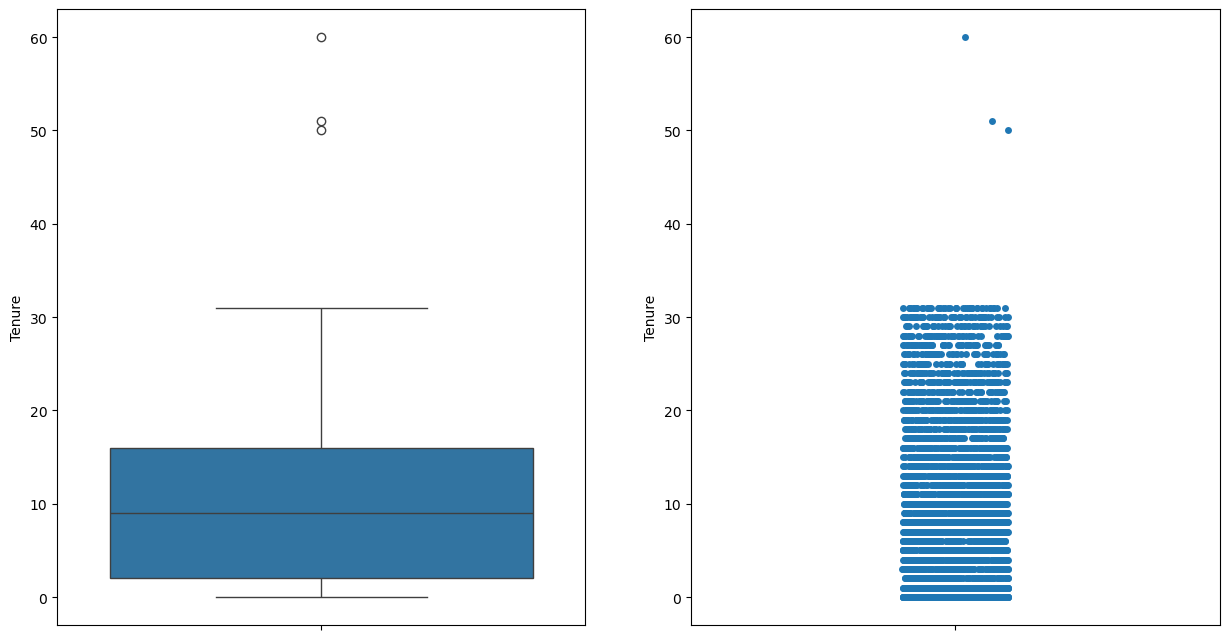

In [66]:
# Verificando dados Outliers 

# Cria uma nova figura (área para desenhar) com tamanho 15 de largura e 8 de altura
fig = plt.figure(figsize=(15, 8))

# Define uma grade (grid) com 1 linha e 2 colunas para organizar os subgráficos
gs = GridSpec(1, 2)

# Cria o primeiro gráfico: um boxplot da coluna "Tenure" usando o espaço da grade [0,0]
sns.boxplot(x_train["Tenure"], ax=fig.add_subplot(gs[0, 0]))

# Cria o segundo gráfico: um stripplot da coluna "Tenure" usando o espaço da grade [0,1]
sns.stripplot(x_train["Tenure"], ax=fig.add_subplot(gs[0, 1]))

# Mostra os dois gráficos lado a lado
plt.show()


In [67]:
x_train['Tenure'].sort_values(ascending = False)

2719    60.0
3743    51.0
928     50.0
4258    31.0
3699    31.0
        ... 
1359     NaN
2058     NaN
1706     NaN
690      NaN
2409     NaN
Name: Tenure, Length: 4504, dtype: float64

In [68]:
# Se o valor da coluna 'Tenure' for maior que 31, substitui por 31.
# Se não, mantém o valor original.

x_train['Tenure'] = np.where(x_train['Tenure'] > 31, 31, x_train['Tenure'])
x_test['Tenure'] = np.where(x_test['Tenure'] > 31, 31, x_test['Tenure'])

In [70]:
x_train['Tenure'].sort_values(ascending = False)

4258    31.0
3433    31.0
4468    31.0
3226    31.0
3609    31.0
        ... 
1359     NaN
2058     NaN
1706     NaN
690      NaN
2409     NaN
Name: Tenure, Length: 4504, dtype: float64

In [71]:
x_train[x_train['Tenure'].isnull() == True]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1172,NaN,Phone,2,26.0,CC,Female,3.0,3,Mobile,4,Married,1,1,11.0,0.0,1.0,4.0,121.48
847,NaN,Computer,1,6.0,Debit Card,Female,3.0,3,Mobile Phone,2,Single,2,0,15.0,1.0,1.0,0.0,116.11
1303,NaN,Phone,3,6.0,CC,Male,3.0,4,Mobile,4,Married,1,0,14.0,0.0,2.0,2.0,122.69
2234,NaN,Phone,1,20.0,Debit Card,Male,2.0,3,Mobile,5,Married,2,1,14.0,5.0,6.0,8.0,122.35
2322,NaN,Computer,1,32.0,Cash on Delivery,Female,3.0,4,Mobile,3,Married,2,0,20.0,1.0,1.0,0.0,120.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
2058,NaN,Phone,1,6.0,CC,Female,3.0,3,Mobile,1,Married,4,0,14.0,1.0,1.0,2.0,122.70
1706,NaN,Phone,1,16.0,Debit Card,Female,2.0,1,Mobile,3,Married,4,1,13.0,0.0,1.0,7.0,122.13
690,NaN,Phone,1,6.0,Cash on Delivery,Female,3.0,4,Mobile,4,Single,2,1,11.0,0.0,2.0,2.0,120.70


In [72]:
x_train['Tenure'].median() # Calcula a mediana


9.0

In [73]:
# Substituindo valores nulos pela mediana

x_train['Tenure'] = x_train['Tenure'].fillna(x_train['Tenure'].median())
x_test['Tenure'] = x_test['Tenure'].fillna(x_test['Tenure'].median())

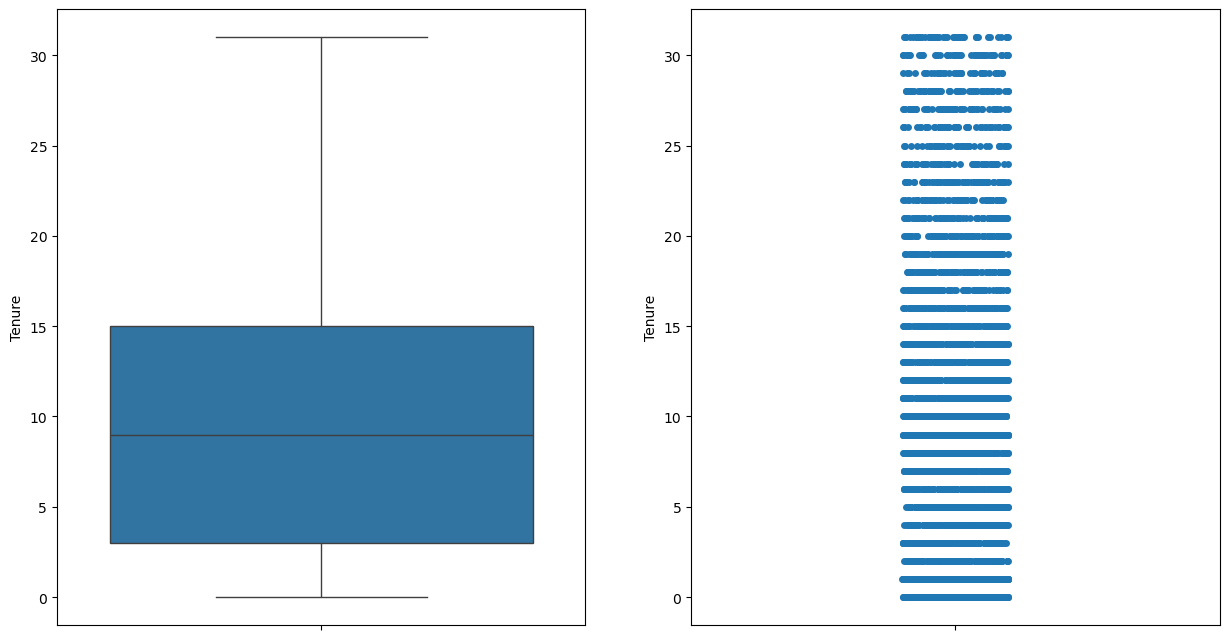

In [74]:
# Rodando o gráfico novamente, com os valores substituídos 

fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train["Tenure"], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train["Tenure"], ax = fig.add_subplot(gs[0,1]))
plt.show()

# 📈 Avaliando Relação com o Churn

## Serve para ver distribuições e diferenças no tempo de permanência entre quem ficou e quem saiu.

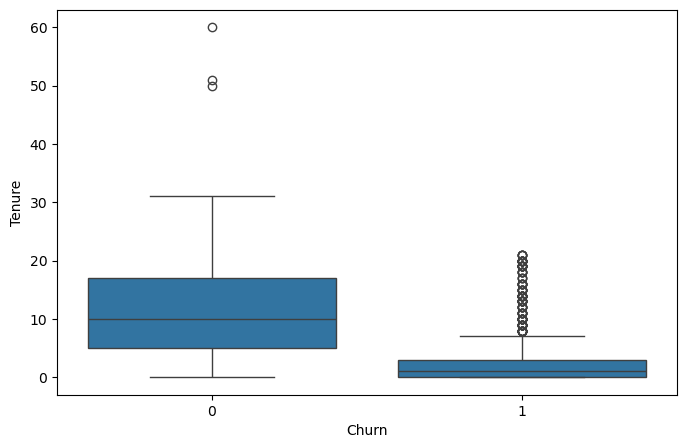

In [76]:
plt.figure(figsize = (8,5))
sns.boxplot(x = train['Churn'], y = train['Tenure'])
plt.show()


In [77]:
train[['Tenure', 'Churn']].corr()

,Tenure,Churn
Tenure,1.00000,-0.35548
Churn,-0.35548,1.00000


# 📱 PreferredLoginDevice

## Dispositivo preferido para login do usuário

In [79]:
x_train['PreferredLoginDevice'].isnull().sum(), x_test['PreferredLoginDevice'].isnull().sum()

(0, 0)

In [80]:
x_train['PreferredLoginDevice'].value_counts() # Verificando valores únicos

PreferredLoginDevice
Mobile Phone    2213
Computer        1310
Phone            981
Name: count, dtype: int64

In [81]:
# Criação de colunas dummies: Transformando as variáveis textuais em númericas
# Cada nova coluna indica com 1 ou 0: 1 se o valor em PreferredLoginDevice é aquele específico, 0 se não for.

x_train['PreferredLoginDevice_mobile_phone'] = np.where(x_train['PreferredLoginDevice'] == "Mobile Phone", 1,0)
x_train['PreferredLoginDevice_computer'] = np.where(x_train['PreferredLoginDevice'] == "Computer", 1,0)
x_train['PreferredLoginDevice_phone'] = np.where(x_train['PreferredLoginDevice'] == "Phone", 1,0)
x_train.drop(columns =  ['PreferredLoginDevice'], inplace = True) # Remoção da coluna original

In [85]:
x_test['PreferredLoginDevice_mobile_phone'] = np.where(x_test['PreferredLoginDevice'] == "Mobile Phone", 1,0)
x_test['PreferredLoginDevice_computer'] = np.where(x_test['PreferredLoginDevice'] == "Computer", 1,0)
x_test['PreferredLoginDevice_phone'] = np.where(x_test['PreferredLoginDevice'] == "Phone", 1,0)
x_test.drop(columns =  ['PreferredLoginDevice'], inplace = True)

# 🏙 CityTier

## Variável Hierárquica Comparando o Desenvolvimento das Cidades

In [94]:
x_train['CityTier'].isnull().sum(), x_test['CityTier'].isnull().sum()

(0, 0)

In [97]:
x_train['CityTier'].value_counts()

CityTier
1    2916
3    1396
2     192
Name: count, dtype: int64

# 🚚 WarehouseToHome

## Distância do armazém e a casa do usuário

In [106]:
x_train['WarehouseToHome'].isnull().sum(), x_test['WarehouseToHome'].isnull().sum()

(204, 47)

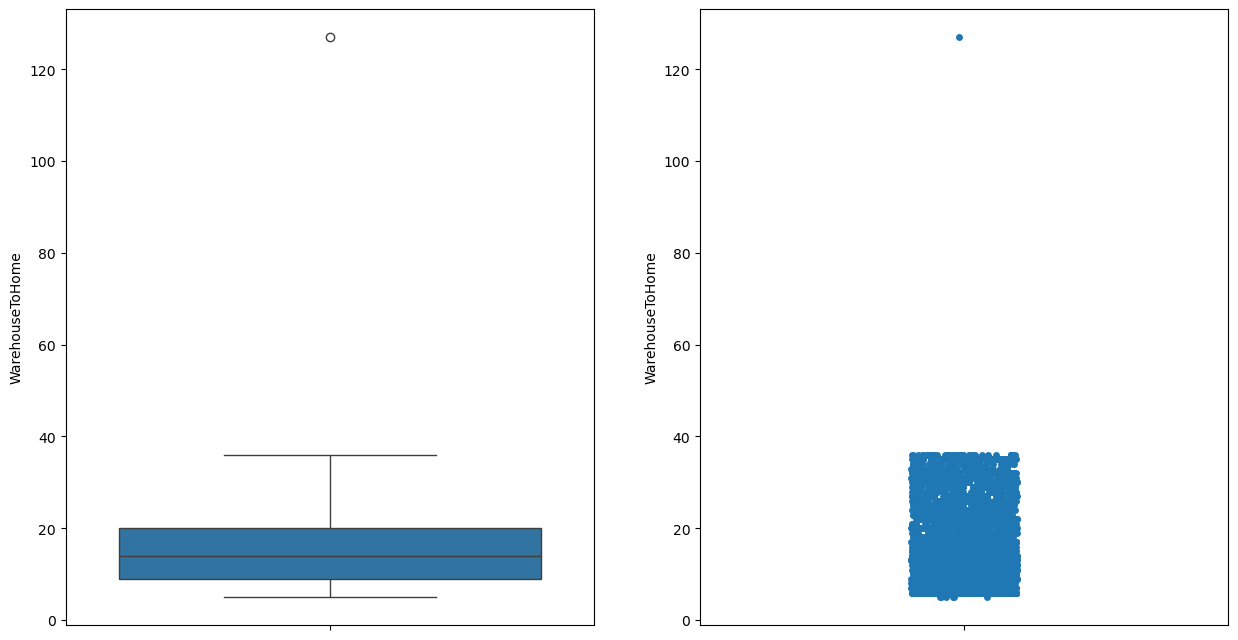

In [108]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['WarehouseToHome'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['WarehouseToHome'], ax = fig.add_subplot(gs[0,1]))
plt.show()

In [111]:
# Substituindo com a mediana

x_train['WarehouseToHome'].median()

14.0

In [116]:
x_train['WarehouseToHome'] = x_train['WarehouseToHome'].fillna(x_train['WarehouseToHome'].median())
x_test['WarehouseToHome'] = x_test['WarehouseToHome'].fillna(x_test['WarehouseToHome'].median())

In [117]:
x_train.WarehouseToHome.sort_values(ascending = False)

4124    127.0
5197     36.0
4984     36.0
4764     36.0
2949     36.0
        ...  
451       5.0
2201      5.0
2151      5.0
1401      5.0
1776      5.0
Name: WarehouseToHome, Length: 4504, dtype: float64

In [120]:
x_train['WarehouseToHome'] = x_train['WarehouseToHome'].replace(126, 16)

In [121]:
x_test.WarehouseToHome.sort_values(ascending = False)

1309    126.0
5233     36.0
2889     36.0
5390     36.0
3669     36.0
        ...  
1262      6.0
3266      6.0
1223      6.0
3490      5.0
201       5.0
Name: WarehouseToHome, Length: 1126, dtype: float64

In [123]:
x_test['WarehouseToHome'] = x_test['WarehouseToHome'].replace(127, 17)

# 📈 Avaliando Relação com a Variável Churn

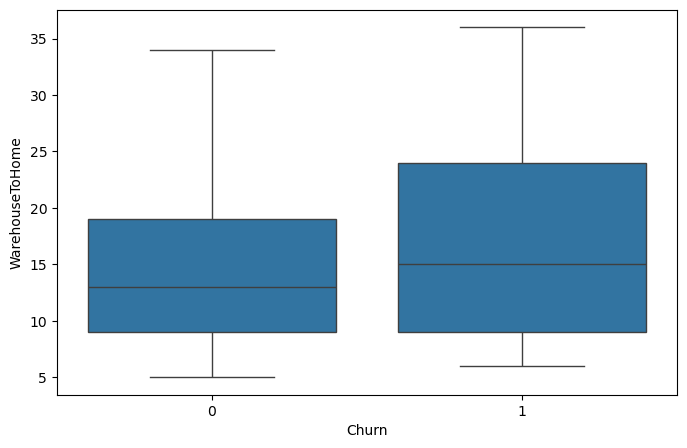

In [129]:
plt.figure(figsize = (8,5))
sns.boxplot(x = train['Churn'], y = train['WarehouseToHome'], showfliers = False)
plt.show()

# 💰 PreferredPaymentMode

## Método de pagamento preferido pelo usuário

In [135]:
x_train['PreferredPaymentMode'].isnull().sum(), x_test['PreferredPaymentMode'].isnull().sum()

(0, 0)

In [137]:
x_train['PreferredPaymentMode'].value_counts() # Verificando valores distintos

PreferredPaymentMode
Debit Card          1865
Credit Card         1176
E wallet             493
UPI                  333
COD                  294
CC                   224
Cash on Delivery     119
Name: count, dtype: int64

In [139]:
# Criação de colunas binárias (dummies) para a variável 'PreferredPaymentMode'
# Cada nova coluna indica com 1 ou 0 se o valor em 'PreferredPaymentMode' corresponde a um tipo específico de pagamento.

x_train['PreferredPaymentMode_Debit'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Debit Card" else 0)  # Se 'PreferredPaymentMode' for "Debit Card", atribui 1, senão 0
x_train['PreferredPaymentMode_Credit'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Credit Card" else 0)  # Se 'PreferredPaymentMode' for "Credit Card", atribui 1, senão 0
x_train['PreferredPaymentMode_Ewallet'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "E wallet" else 0)  # Se 'PreferredPaymentMode' for "E wallet", atribui 1, senão 0
x_train['PreferredPaymentMode_UPI'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "UPI" else 0)  # Se 'PreferredPaymentMode' for "UPI", atribui 1, senão 0
x_train['PreferredPaymentMode_COD'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "COD" else 0)  # Se 'PreferredPaymentMode' for "COD", atribui 1, senão 0
x_train['PreferredPaymentMode_CC'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "CC" else 0)  # Se 'PreferredPaymentMode' for "CC", atribui 1, senão 0
x_train['PreferredPaymentMode_Cash'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Cash on Delivery" else 0)  # Se 'PreferredPaymentMode' for "Cash on Delivery", atribui 1, senão 0

# Remove a coluna original 'PreferredPaymentMode' após a criação das colunas binárias
x_train.drop(columns = ['PreferredPaymentMode'], inplace=True)

In [141]:
x_test['PreferredPaymentMode_Debit'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Debit Card" else 0)
x_test['PreferredPaymentMode_Credit'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Credit Card" else 0)
x_test['PreferredPaymentMode_Ewallet'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "E wallet" else 0)
x_test['PreferredPaymentMode_UPI'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "UPI" else 0)
x_test['PreferredPaymentMode_COD'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "COD" else 0)
x_test['PreferredPaymentMode_CC'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "CC" else 0)
x_test['PreferredPaymentMode_Cash'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Cash on Delivery" else 0)
x_test.drop(columns = ['PreferredPaymentMode'], inplace=True)

# 🚻 Gender

## Gênero do Usuário

In [144]:
x_train['Gender'].isnull().sum(), x_test['Gender'].isnull().sum()

(0, 0)

In [146]:
x_train['Gender'].value_counts()

Gender
Male      2673
Female    1831
Name: count, dtype: int64

In [148]:
# Transforma a variável categórica Gender em uma variável binária

x_train['Gender'] = x_train['Gender'].apply(lambda x: 1 if x == "Male" else 0)
x_test['Gender'] = x_train['Gender'].apply(lambda x: 1 if x == "Male" else 0)

# 🕒 HourSpendOnApp
## Número de horas que os usuários passam na aplicação (Web e Mobile)

In [151]:
x_train['HourSpendOnApp'].isnull().sum(), x_test['HourSpendOnApp'].isnull().sum()

(200, 55)

In [153]:
x_train['HourSpendOnApp'] = x_train['HourSpendOnApp'].fillna(0)
x_test['HourSpendOnApp'] = x_test['HourSpendOnApp'].fillna(0)

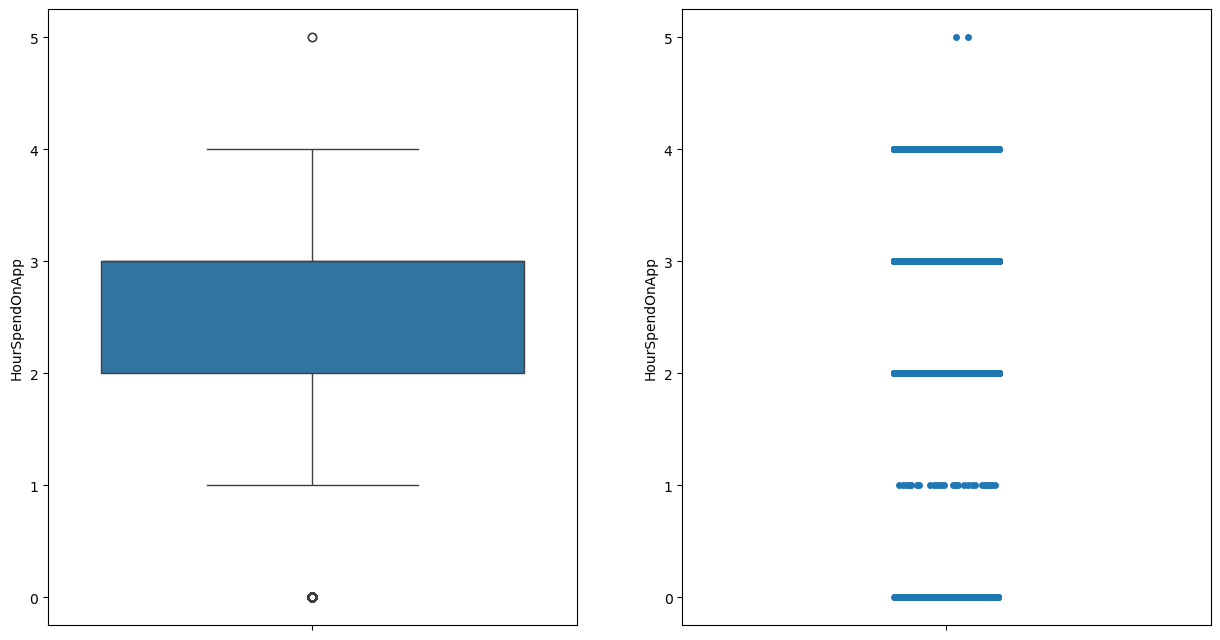

In [155]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['HourSpendOnApp'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['HourSpendOnApp'], ax = fig.add_subplot(gs[0,1]))
plt.show()

## 📈 Avaliando Relação com o Churn

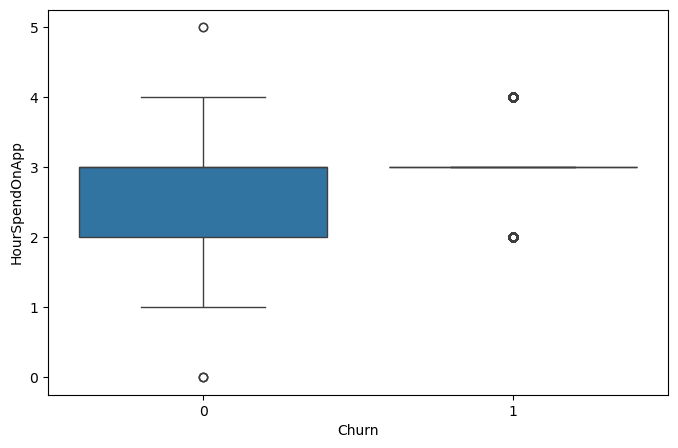

In [158]:
plt.figure(figsize = (8,5))
sns.boxplot(x = train['Churn'], y = train['HourSpendOnApp'])
plt.show()

# ☎️ NumberOfDeviceRegistered
## Total de números registrados no dispositivo do usuário

In [161]:
x_train['NumberOfDeviceRegistered'].isnull().sum(), x_test['NumberOfDeviceRegistered'].isnull().sum()

(0, 0)

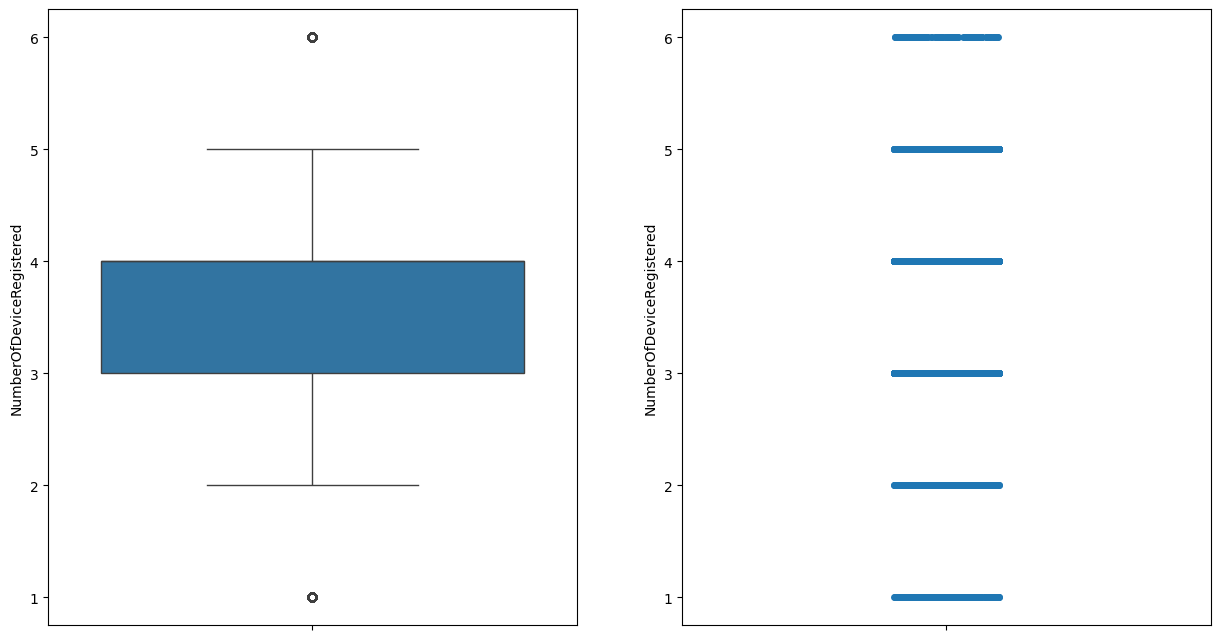

In [163]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['NumberOfDeviceRegistered'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['NumberOfDeviceRegistered'], ax = fig.add_subplot(gs[0,1]))
plt.show()

## 📈 Avaliando Relação com o Churn

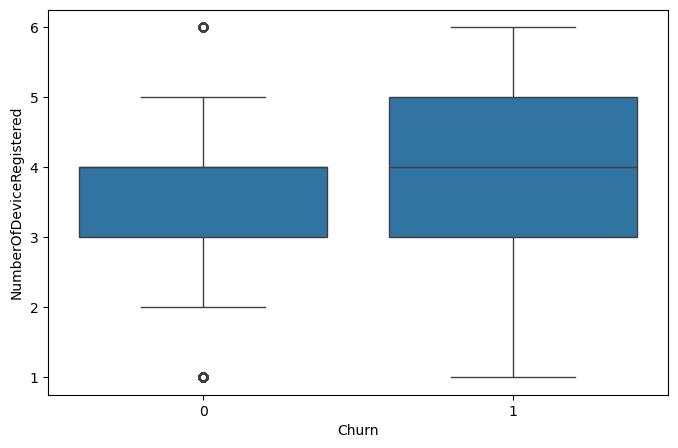

In [165]:
plt.figure(figsize = (8,5))
sns.boxplot(x = train['Churn'], y = train['NumberOfDeviceRegistered'])
plt.show()

# 🛍 PreferedOrderCat
## Categoria preferida de pedido do usuário no último mês

In [169]:
x_train['PreferedOrderCat'].isnull().sum(), x_test['PreferedOrderCat'].isnull().sum()

(0, 0)

In [171]:
x_train['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1659
Mobile Phone          1018
Fashion                659
Mobile                 643
Grocery                327
Others                 198
Name: count, dtype: int64

In [173]:
x_train['PreferedOrderCat_Laptop'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Laptop & Accessory" else 0)
x_train['PreferedOrderCat_MobilePhone'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile Phone" else 0)
x_train['PreferedOrderCat_Fashion'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Fashion" else 0)
x_train['PreferedOrderCat_Mobile'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile" else 0)
x_train['PreferedOrderCat_Grocery'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Grocery" else 0)
x_train['PreferedOrderCat_Others'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Others" else 0)
x_train.drop(columns = ['PreferedOrderCat'], inplace=True)

In [175]:
x_test['PreferedOrderCat_Laptop'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Laptop & Accessory" else 0)
x_test['PreferedOrderCat_MobilePhone'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile Phone" else 0)
x_test['PreferedOrderCat_Fashion'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Fashion" else 0)
x_test['PreferedOrderCat_Mobile'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile" else 0)
x_test['PreferedOrderCat_Grocery'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Grocery" else 0)
x_test['PreferedOrderCat_Others'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Others" else 0)
x_test.drop(columns = ['PreferedOrderCat'], inplace=True)

# 👍 SatisfactionScore
## Nota de Satisfação do Cliente

In [178]:
x_train['SatisfactionScore'].isnull().sum(), x_test['SatisfactionScore'].isnull().sum()

(0, 0)

In [180]:
x_train['SatisfactionScore'].value_counts()

SatisfactionScore
3    1377
1     927
5     885
4     856
2     459
Name: count, dtype: int64

## 📈 Avaliando Relação com o Churn

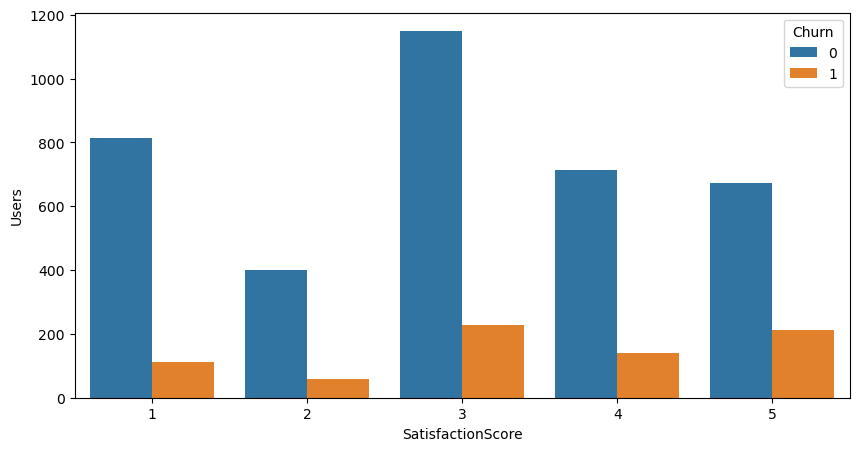

In [183]:
# Gráfico

plt.figure(figsize = (10,5))
sns.countplot(x = train['SatisfactionScore'], hue = train['Churn'])
plt.ylabel('Users')
plt.show()

# 💍 MaritalStatus
## Estado Civil dos Clientes

In [186]:
x_train['MaritalStatus'].isnull().sum(), x_test['MaritalStatus'].isnull().sum()

(0, 0)

In [188]:
x_train['MaritalStatus'].value_counts()

MaritalStatus
Married     2389
Single      1456
Divorced     659
Name: count, dtype: int64

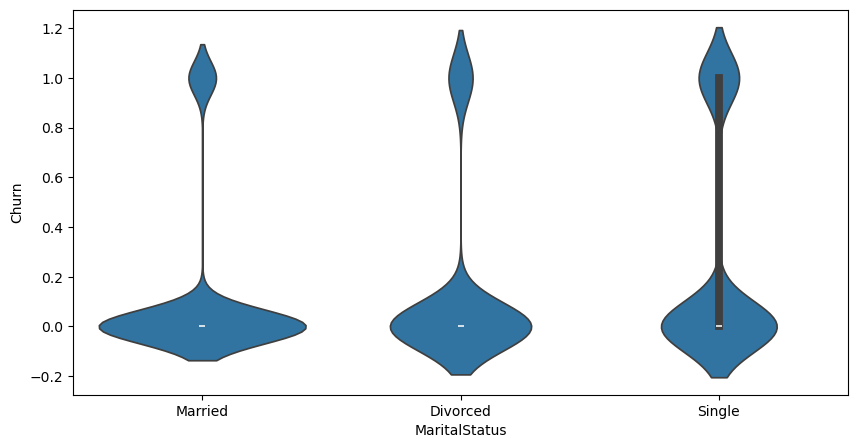

In [190]:
plt.figure(figsize = (10,5))
sns.violinplot(x = train['MaritalStatus'], y = train['Churn'])
plt.show()

## 📈 Relação com a Variável Churn

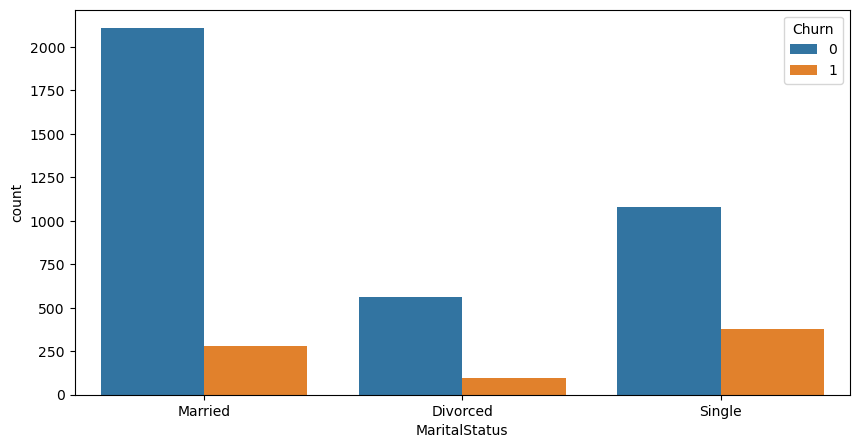

In [193]:
plt.figure(figsize = (10,5))
sns.countplot(x = train['MaritalStatus'], hue = train['Churn'])
plt.show()

In [194]:
x_train['MaritalStatus_Single'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Single" else 0)
x_train['MaritalStatus_Divorced'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Divorced" else 0)
x_train['MaritalStatus_Married'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Married" else 0)
x_train.drop(columns = ['MaritalStatus'], inplace=True)

In [197]:
x_test['MaritalStatus_Single'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Single" else 0)
x_test['MaritalStatus_Divorced'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Divorced" else 0)
x_test['MaritalStatus_Married'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Married" else 0)
x_test.drop(columns = ['MaritalStatus'], inplace=True)

# 🏘 NumberOfAddress
## Número de Endereços

In [200]:
x_train['NumberOfAddress'].isnull().sum(), x_test['NumberOfAddress'].isnull().sum()

(0, 0)

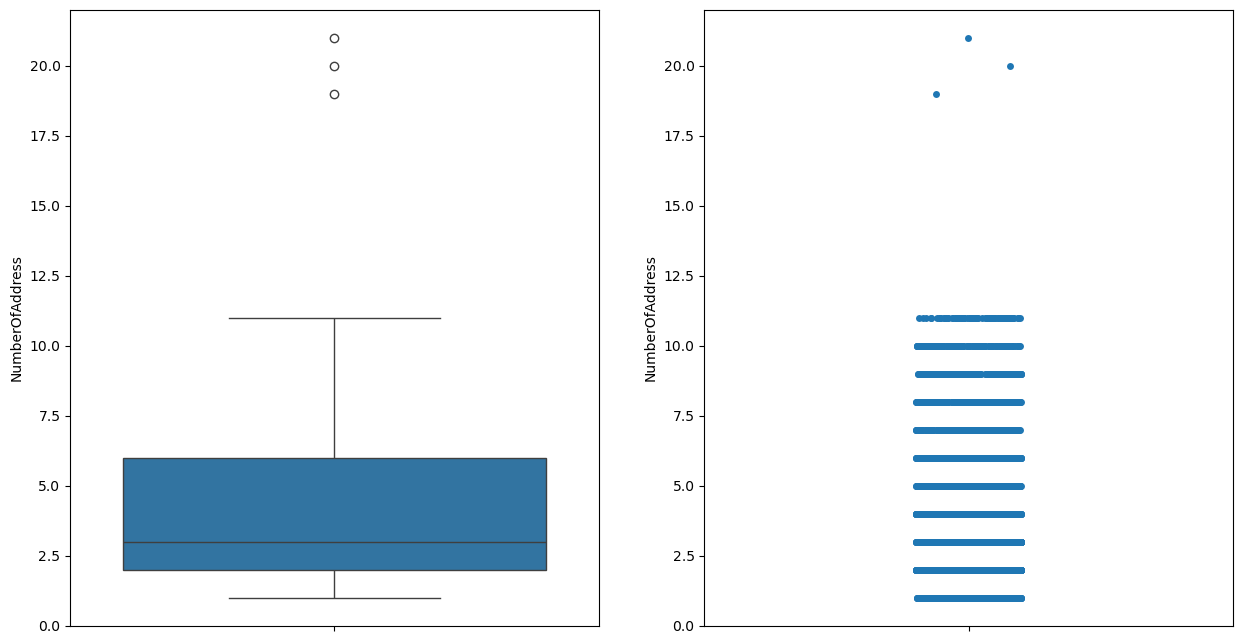

In [202]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['NumberOfAddress'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['NumberOfAddress'], ax = fig.add_subplot(gs[0,1]))
plt.show()

In [203]:
x_train.NumberOfAddress.sort_values(ascending = False).head(5)

691     21
3075    20
260     19
4132    11
3690    11
Name: NumberOfAddress, dtype: int64

In [206]:
x_test.NumberOfAddress.sort_values(ascending = False).head(5)

3506    22
3637    11
4354    11
2888    11
3952    11
Name: NumberOfAddress, dtype: int64

In [208]:
x_train.NumberOfAddress = np.where(x_train.NumberOfAddress > 15, 11, x_train.NumberOfAddress) # Substituindo valores outliers

## 📈 Relação com o Churn

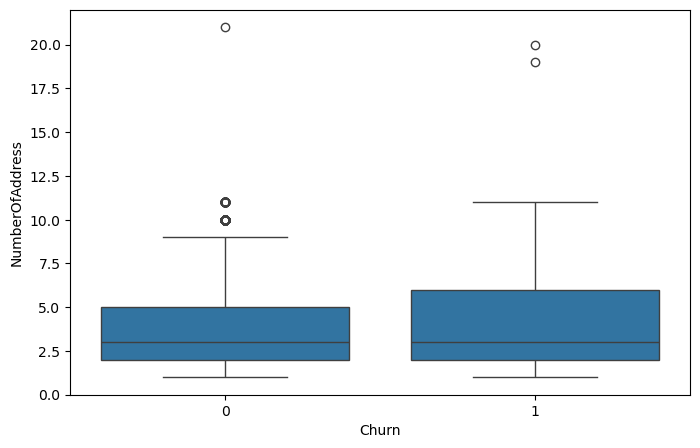

In [211]:
plt.figure(figsize = (8,5))
sns.boxplot (x = train['Churn'], y = train['NumberOfAddress'])
plt.show()

In [213]:
train[['NumberOfAddress', 'Churn']].corr()

,NumberOfAddress,Churn
NumberOfAddress,1.000000,0.043076
Churn,0.043076,1.000000


# 🗣️ Complain
## Variável que define se o usuário criou ou não uma reclamação no último mês

In [216]:
x_train['Complain'].isnull().sum(), x_test['Complain'].isnull().sum()

(0, 0)

In [218]:
x_train['Complain'].value_counts()

Complain
0    3221
1    1283
Name: count, dtype: int64

## 📈 Relação com o Churn

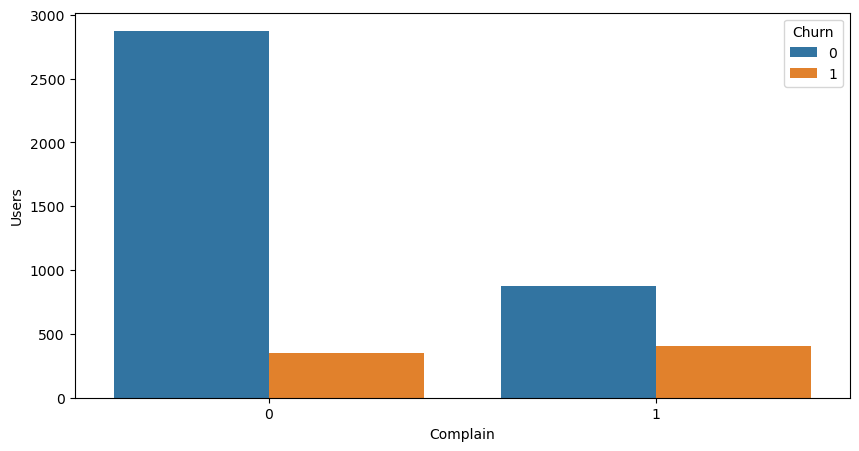

In [221]:
plt.figure(figsize = (10,5))
sns.countplot(x = train['Complain'], hue = train['Churn'])
plt.ylabel('Users')
plt.show()

# ⬆️ OrderAmountHikeFromlastYear
## Porcentagem de crescimento de um ano para o outro

In [224]:
x_train['OrderAmountHikeFromlastYear'].isnull().sum(), x_test['OrderAmountHikeFromlastYear'].isnull().sum()

(199, 66)

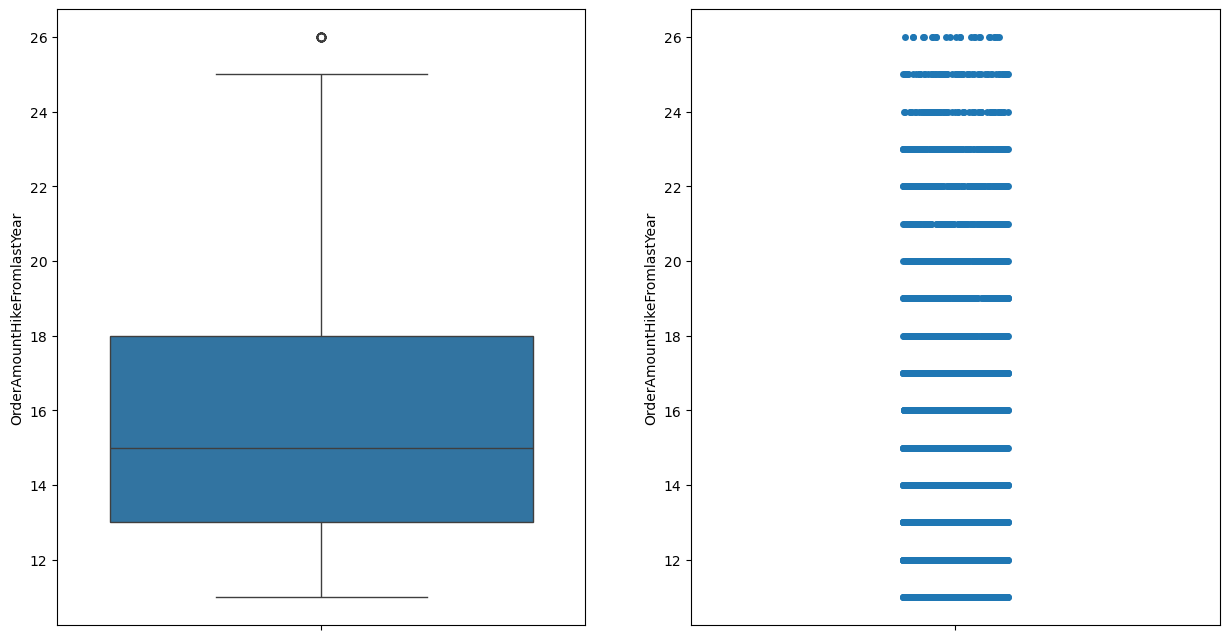

In [226]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['OrderAmountHikeFromlastYear'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['OrderAmountHikeFromlastYear'], ax = fig.add_subplot(gs[0,1]))
plt.show()

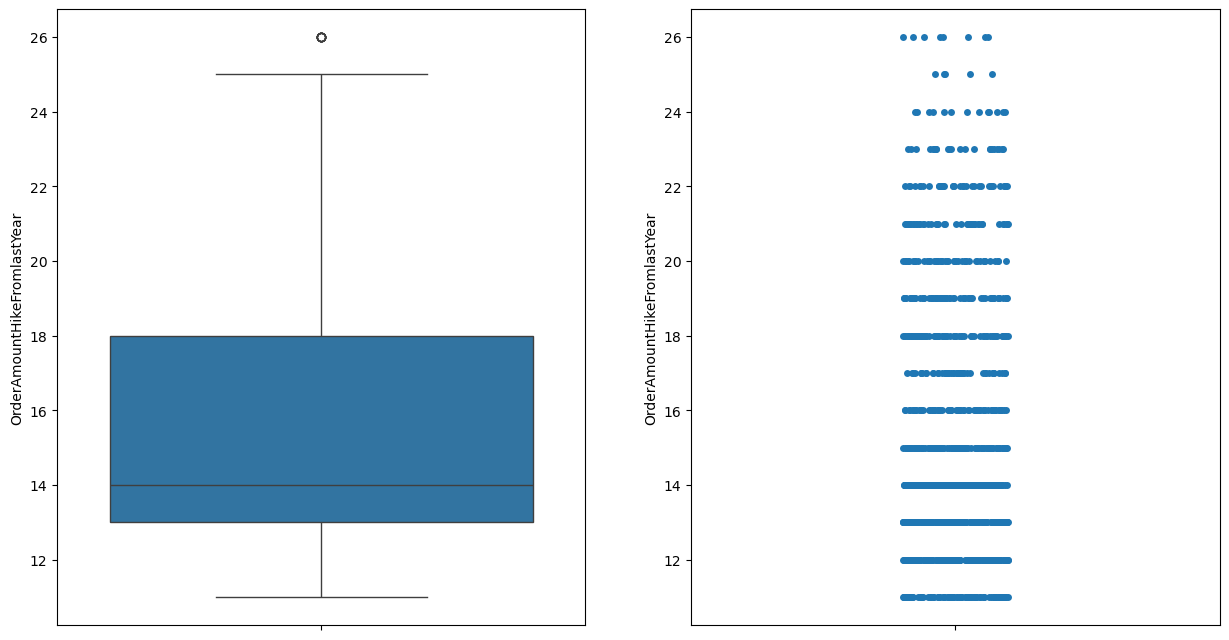

In [227]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_test['OrderAmountHikeFromlastYear'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_test['OrderAmountHikeFromlastYear'], ax = fig.add_subplot(gs[0,1]))
plt.show()

## 📈 Relação com o Churn

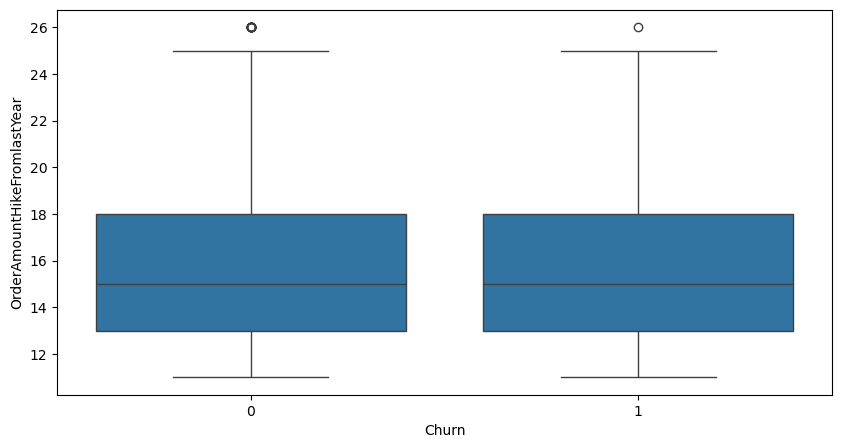

In [231]:
plt.figure(figsize = (10,5))
sns.boxplot(x = train['Churn'], y = train['OrderAmountHikeFromlastYear'])
plt.show()

In [233]:
x_train['OrderAmountHikeFromlastYear'].min(), x_train['OrderAmountHikeFromlastYear'].max()

(11.0, 26.0)

In [235]:
x_train['OrderAmountHikeFromlastYear'] = x_train['OrderAmountHikeFromlastYear'].fillna(0)
x_test['OrderAmountHikeFromlastYear'] = x_test['OrderAmountHikeFromlastYear'].fillna(0)

# 🎟️ CouponUsed

## Total de números de cupons usados no último mês

In [238]:
x_train['CouponUsed'].isnull().sum(), x_test['CouponUsed'].isnull().sum()

(206, 50)

In [240]:
x_train['CouponUsed'] = x_train['CouponUsed'].fillna(0)
x_test['CouponUsed'] = x_test['CouponUsed'].fillna(0)

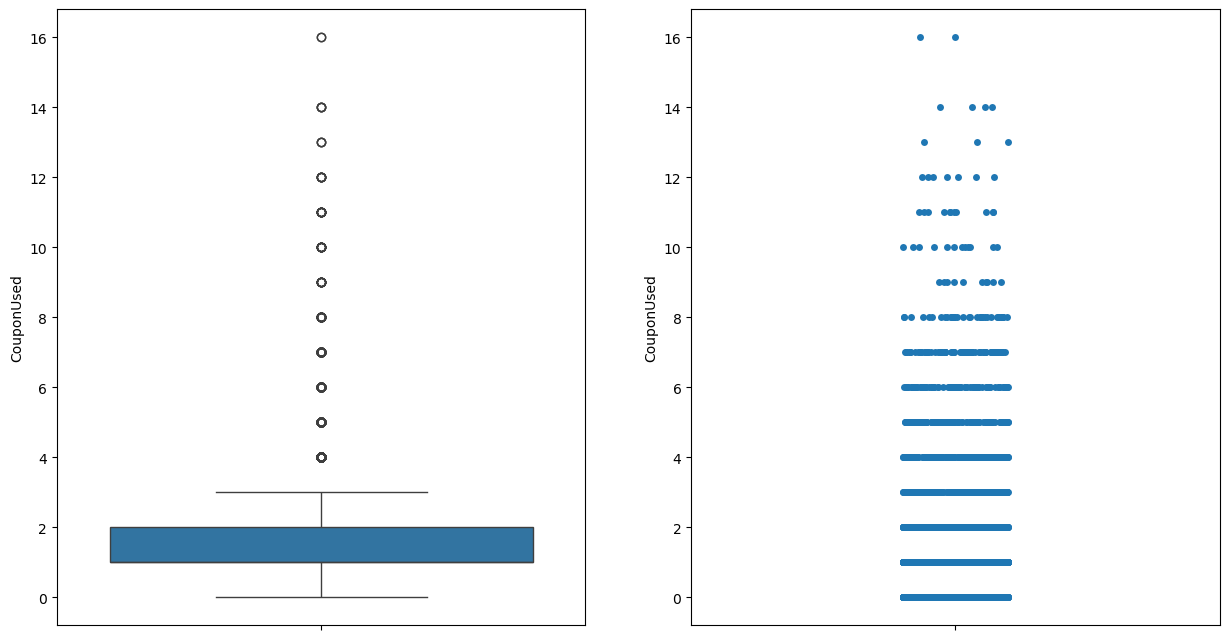

In [242]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['CouponUsed'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['CouponUsed'], ax = fig.add_subplot(gs[0,1]))
plt.show()

In [243]:
# Validando se tem  mais cupons do que pedidos realizados no último mês (incoerência de dados)

x_train[x_train['CouponUsed'] > x_train['OrderCount']]

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Cash,PreferedOrderCat_Laptop,PreferedOrderCat_MobilePhone,PreferedOrderCat_Fashion,PreferedOrderCat_Mobile,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married


## 📈 Relação com o Churn

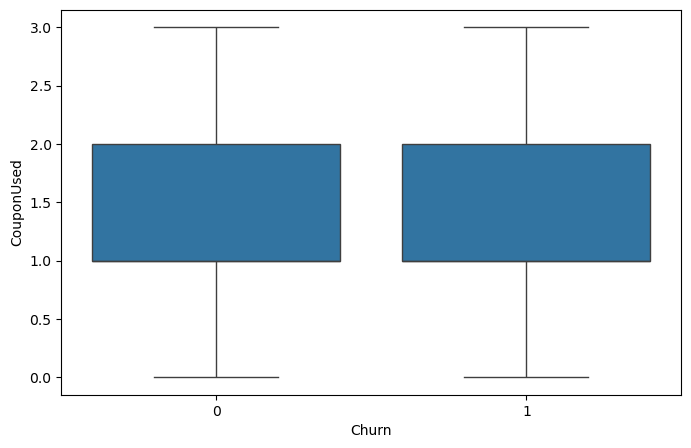

In [247]:
plt.figure(figsize = (8,5))
sns.boxplot(x = train['Churn'], y = train['CouponUsed'], showfliers = False)
plt.show()

# 🛒 OrderCount 

## Número de compras feitas no último mês

In [250]:
x_train['OrderCount'].isnull().sum(), x_test['OrderCount'].isnull().sum()

(205, 53)

In [252]:
# Validando se existe relação entre uma compra não realizada + o uso de cupom (incoerência de dados)

x_train[x_train.OrderCount.isnull() == True] ['CouponUsed']

367     0.0
2702    5.0
3724    1.0
5381    5.0
625     1.0
       ... 
1889    1.0
4436    6.0
1793    4.0
1645    1.0
1052    1.0
Name: CouponUsed, Length: 205, dtype: float64

In [254]:
# Após comparar percebemos que há compras não feitas, mas que ainda assim fizeram uso do cupom, para isso iremos atribuir aos valores nulos de compras o valor utilizado de cupons

x_train['OrderCount'] = np.where(x_train.OrderCount.isnull() == True, x_train.CouponUsed, x_train.OrderCount)
x_test['OrderCount'] = np.where(x_test.OrderCount.isnull() == True, x_test.CouponUsed, x_test.OrderCount)

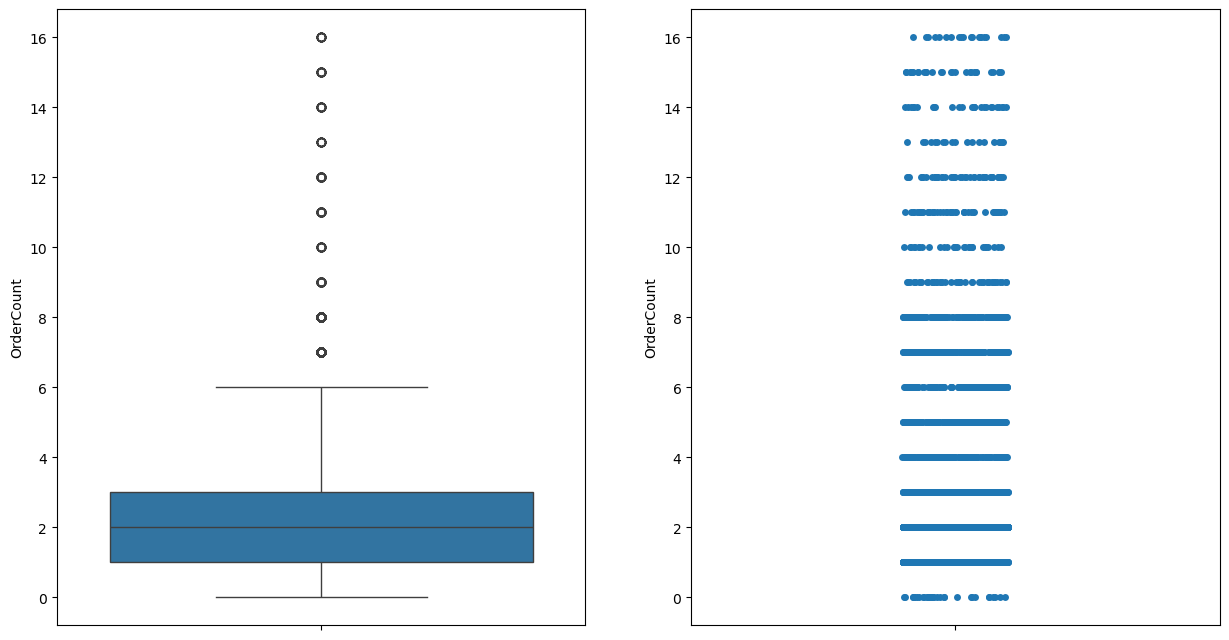

In [256]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['OrderCount'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['OrderCount'], ax = fig.add_subplot(gs[0,1]))
plt.show()

## 📈 Relação com o Churn

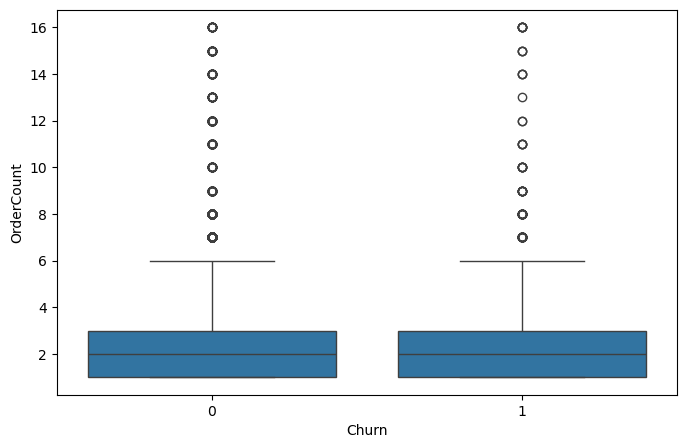

In [259]:
plt.figure(figsize = (8,5))
sns.boxplot(x = train['Churn'], y = train['OrderCount'])
plt.show()

# 🛒 DaySinceLastOrder

## Dias desde a última compra feita pelo usuário

In [262]:
x_train['DaySinceLastOrder'].isnull().sum(), x_test['DaySinceLastOrder'].isnull().sum()

(245, 62)

In [264]:
# Verificando se o campo da variavável está nulo, mas com compras feitas nos últimos 30 dias (incoerência de dados)
x_train[x_train['DaySinceLastOrder'].isnull() == True] ['OrderCount']

1658    8.0
3716    2.0
2337    1.0
2994    4.0
4369    2.0
       ... 
2103    1.0
5147    4.0
4348    2.0
2918    2.0
3801    2.0
Name: OrderCount, Length: 245, dtype: float64

In [266]:
x_test[x_test['DaySinceLastOrder'].isnull() == True] ['OrderCount']

5279     8.0
3223     2.0
4697     2.0
3637     8.0
1337     9.0
        ... 
3578     5.0
5608     2.0
3496     5.0
4188     6.0
4945    12.0
Name: OrderCount, Length: 62, dtype: float64

In [268]:
x_train['DaySinceLastOrder'].median()

3.0

In [270]:
# Substituindo os valores nulos pela mediana

x_train.fillna({'DaySinceLastOrder': 3}, inplace = True)
x_test.fillna({'DaySinceLastOrder': 3}, inplace = True)

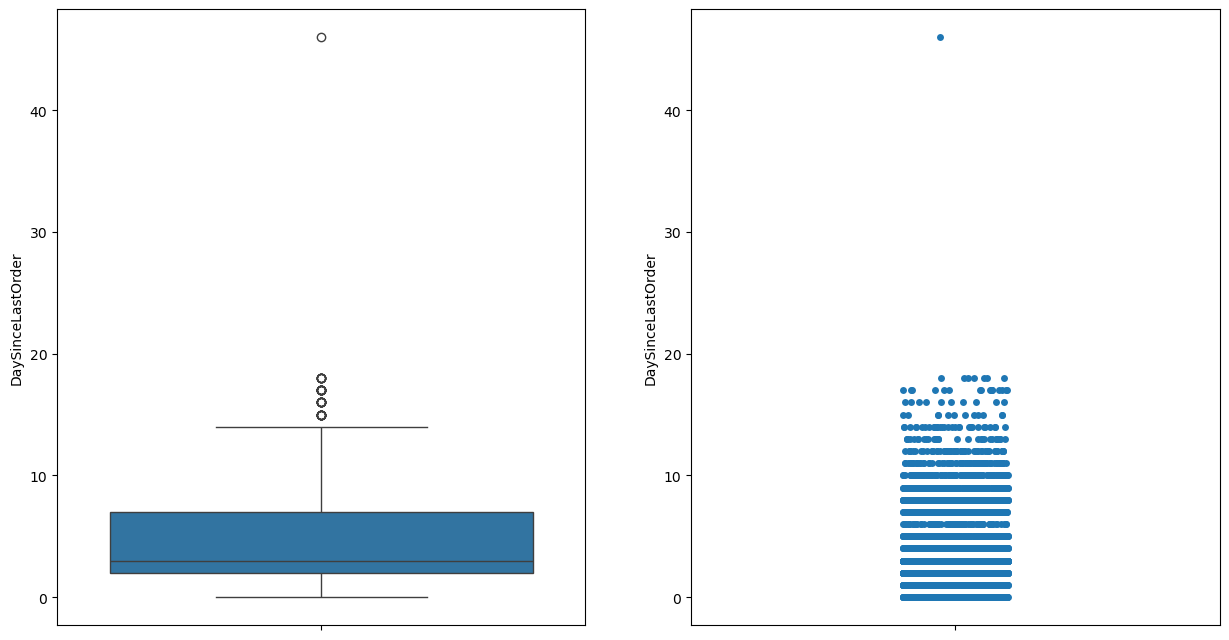

In [272]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['DaySinceLastOrder'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['DaySinceLastOrder'], ax = fig.add_subplot(gs[0,1]))
plt.show()

In [273]:
# Visualizando os registros que constam mais de 30 dias desde a última compra a quantidade de pedidos, cupons e cashback utilizados 

x_train[x_train['DaySinceLastOrder'] >= 30][['DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'CashbackAmount']]

,DaySinceLastOrder,OrderCount,CouponUsed,CashbackAmount
2040,46.0,11.0,5.0,206.09


In [276]:
# Substituindo incoerências por 30

x_train['DaySinceLastOrder'] = np.where(x_train['DaySinceLastOrder'] >= 30, 30, x_train['DaySinceLastOrder'])
x_test['DaySinceLastOrder'] = np.where(x_test['DaySinceLastOrder'] >= 30, 30, x_test['DaySinceLastOrder'])

# 💲CashbackAmount

## Cashback no último mês de cada usuário

In [279]:
x_train['CashbackAmount'].isnull().sum(), x_test['CashbackAmount'].isnull().sum()

(0, 0)

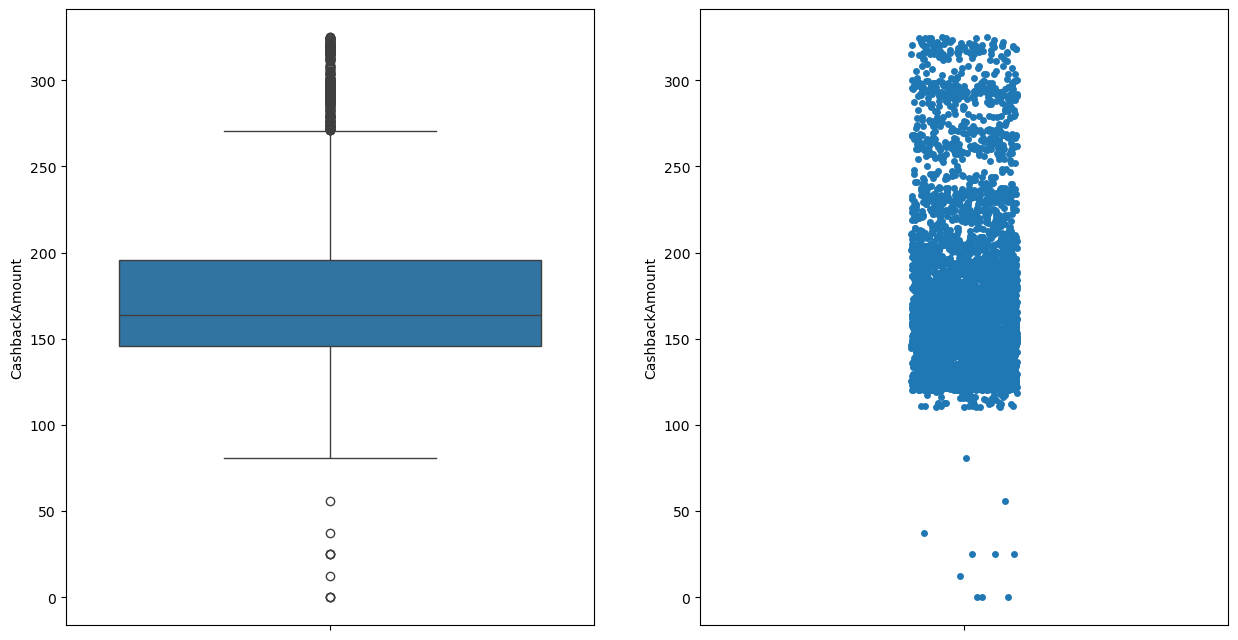

In [281]:
fig = plt.figure(figsize = (15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['CashbackAmount'], ax = fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['CashbackAmount'], ax = fig.add_subplot(gs[0,1]))
plt.show()

## 📈 Relação com o Churn

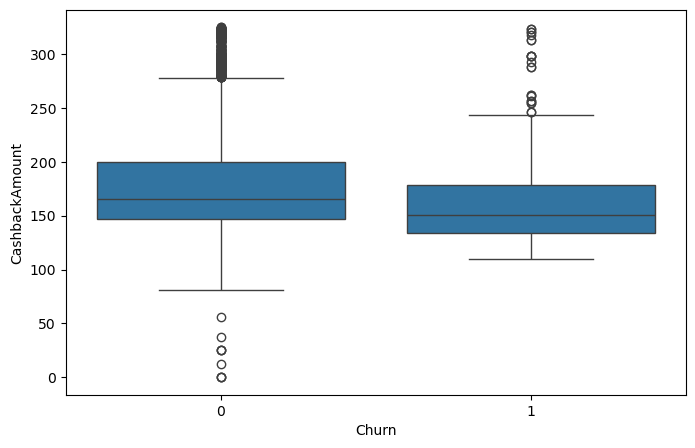

In [284]:
plt.figure(figsize = (8,5))
sns.boxplot(x = train['Churn'], y = train['CashbackAmount'])
plt.show()

In [286]:
# Verificando se possui usuários com pedidos zerados nos últimos 30 dias, mas com disponibilidade de cashback

x_train[x_train.OrderCount == 0][['OrderCount', 'CouponUsed', 'CashbackAmount']]

,OrderCount,CouponUsed,CashbackAmount
367,0.0,0.0,254.02
2511,0.0,0.0,252.02
762,0.0,0.0,231.91
1560,0.0,0.0,235.91
2232,0.0,0.0,231.91
2355,0.0,0.0,247.32
1580,0.0,0.0,260.64
1620,0.0,0.0,236.03
409,0.0,0.0,248.14
143,0.0,0.0,234.96


In [288]:
 x_train.OrderCount.median()

2.0

In [290]:
# Substituindo incoerência pela mediana de OrderCount

x_train.OrderCount = np.where((x_train.OrderCount == 0) & (x_train.CashbackAmount > 0), 2, x_train.OrderCount)
x_test.OrderCount = np.where((x_test.OrderCount == 0) & (x_test.CashbackAmount > 0), 2, x_test.OrderCount)

# Correlação entre Variáveis

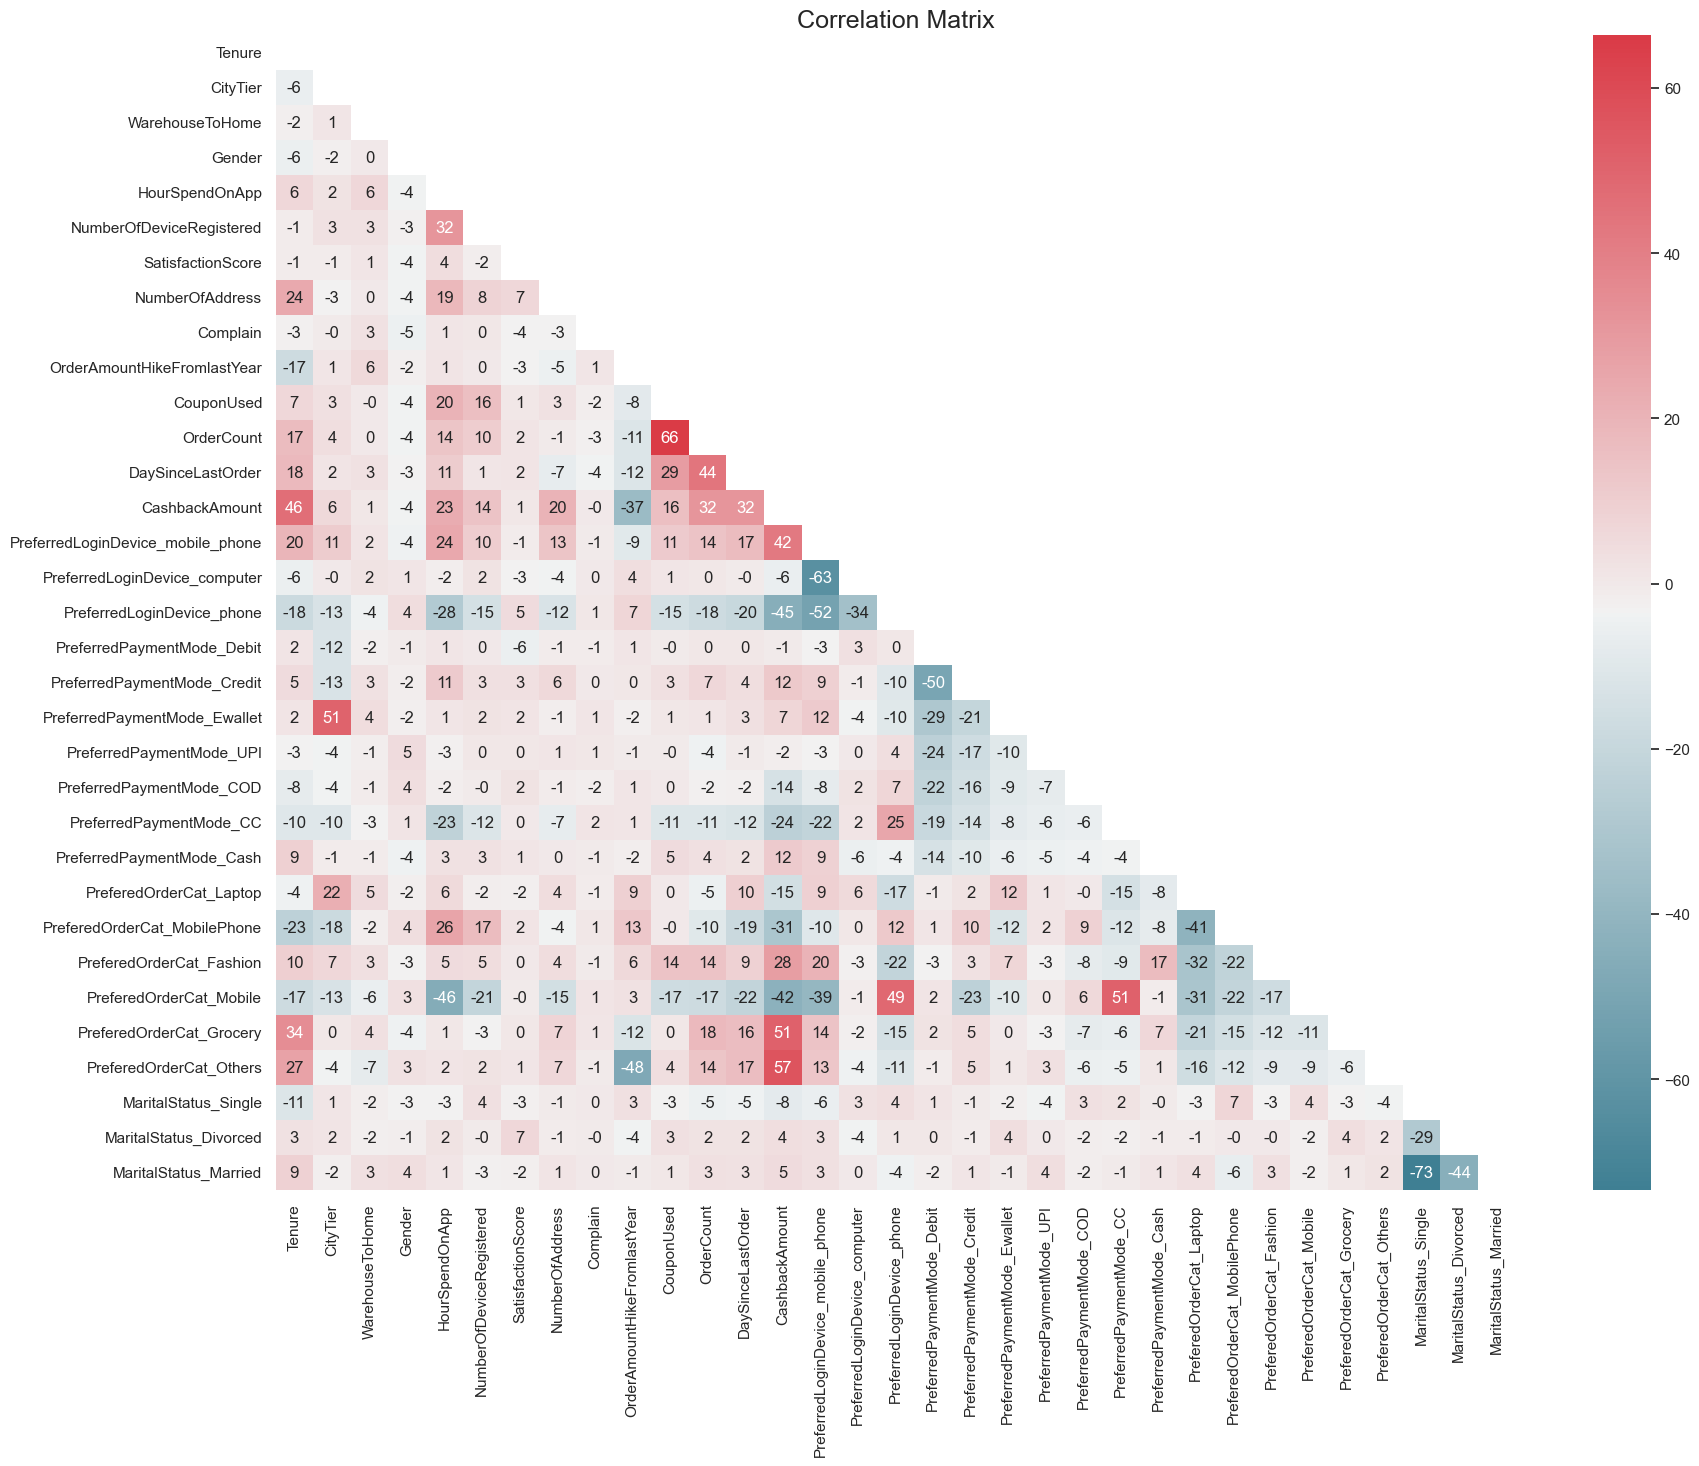

In [293]:
sns.set(style = 'white')

corr = 100 * x_train.corr()

mask = np.triu(np.ones_like(corr, dtype = np.bool_))

f, ax = plt.subplots(figsize = (20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

plt.title('Correlation Matrix', fontsize = 18)

sns.heatmap(corr, mask = mask, cmap = cmap, annot = True, fmt = '.0f')

plt.show()

# 🤖 Machine Learning

## Principais Variavéis Que Contribuem Para Uma Previsão De Churn (Feature Importance) 

In [295]:
# Realizando o balanceamento da variável Churn antes de fazer o treinamento

rf = RandomForestClassifier(class_weight = 'balanced')
rf.fit(np.array(x_train), np.array(y_train['Churn']))

RandomForestClassifier(class_weight='balanced')

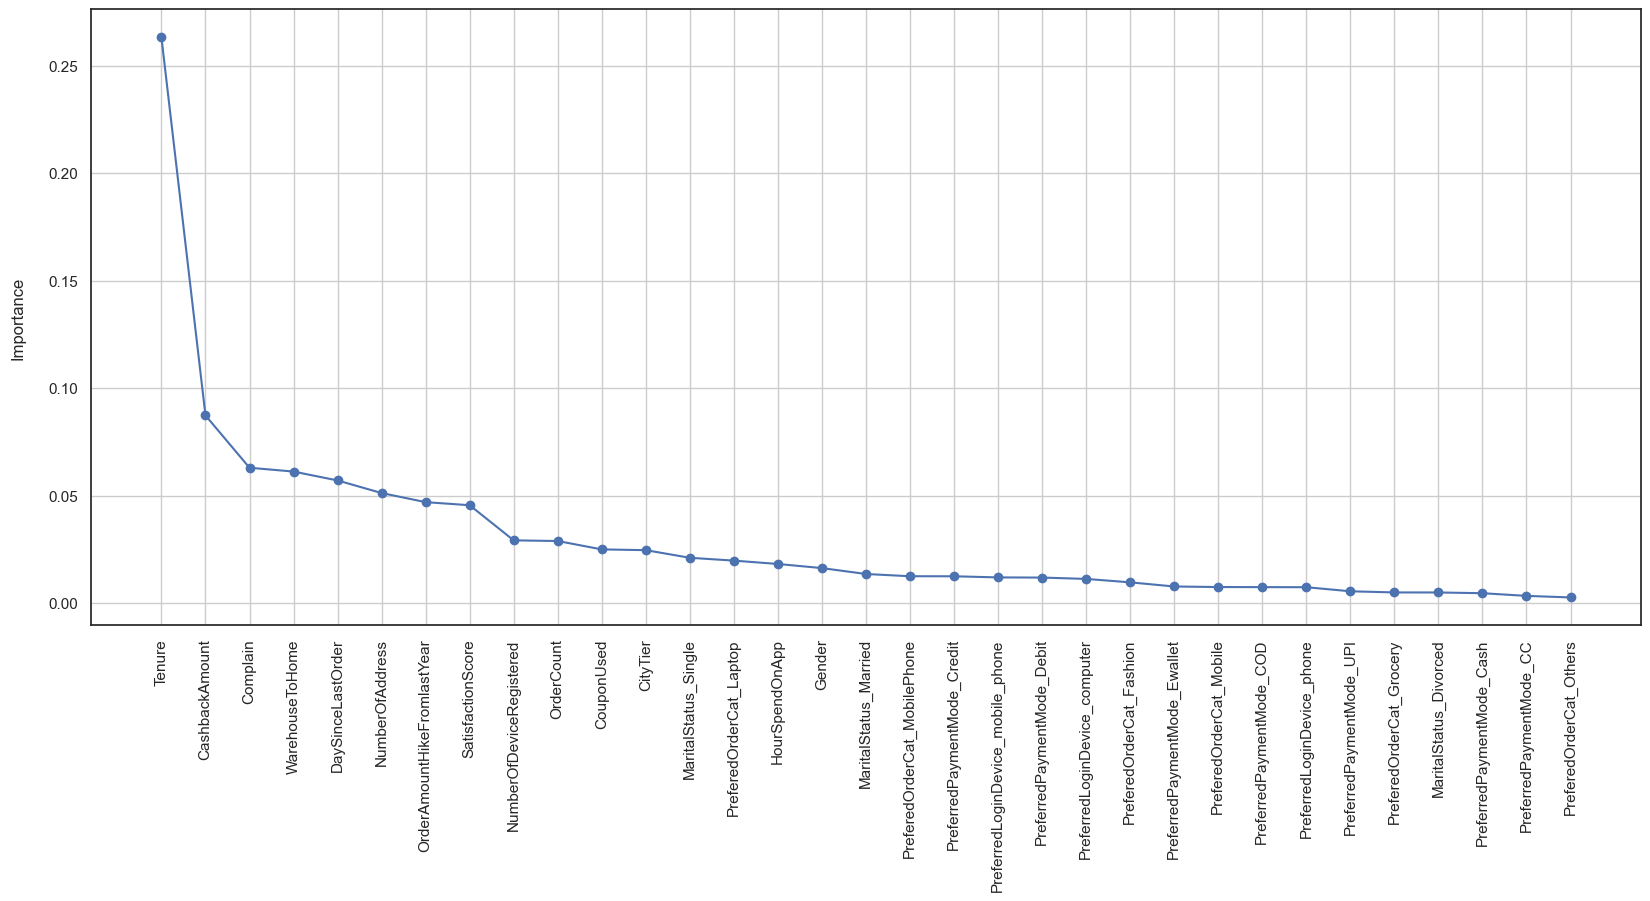

In [296]:
# Gráfico para ilustrar a importância das variáveis

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.plot(feature_importances)
plt.scatter(y=feature_importances.importance,x=feature_importances.index)
plt.ylabel('Importance\n')
plt.grid()
plt.show()

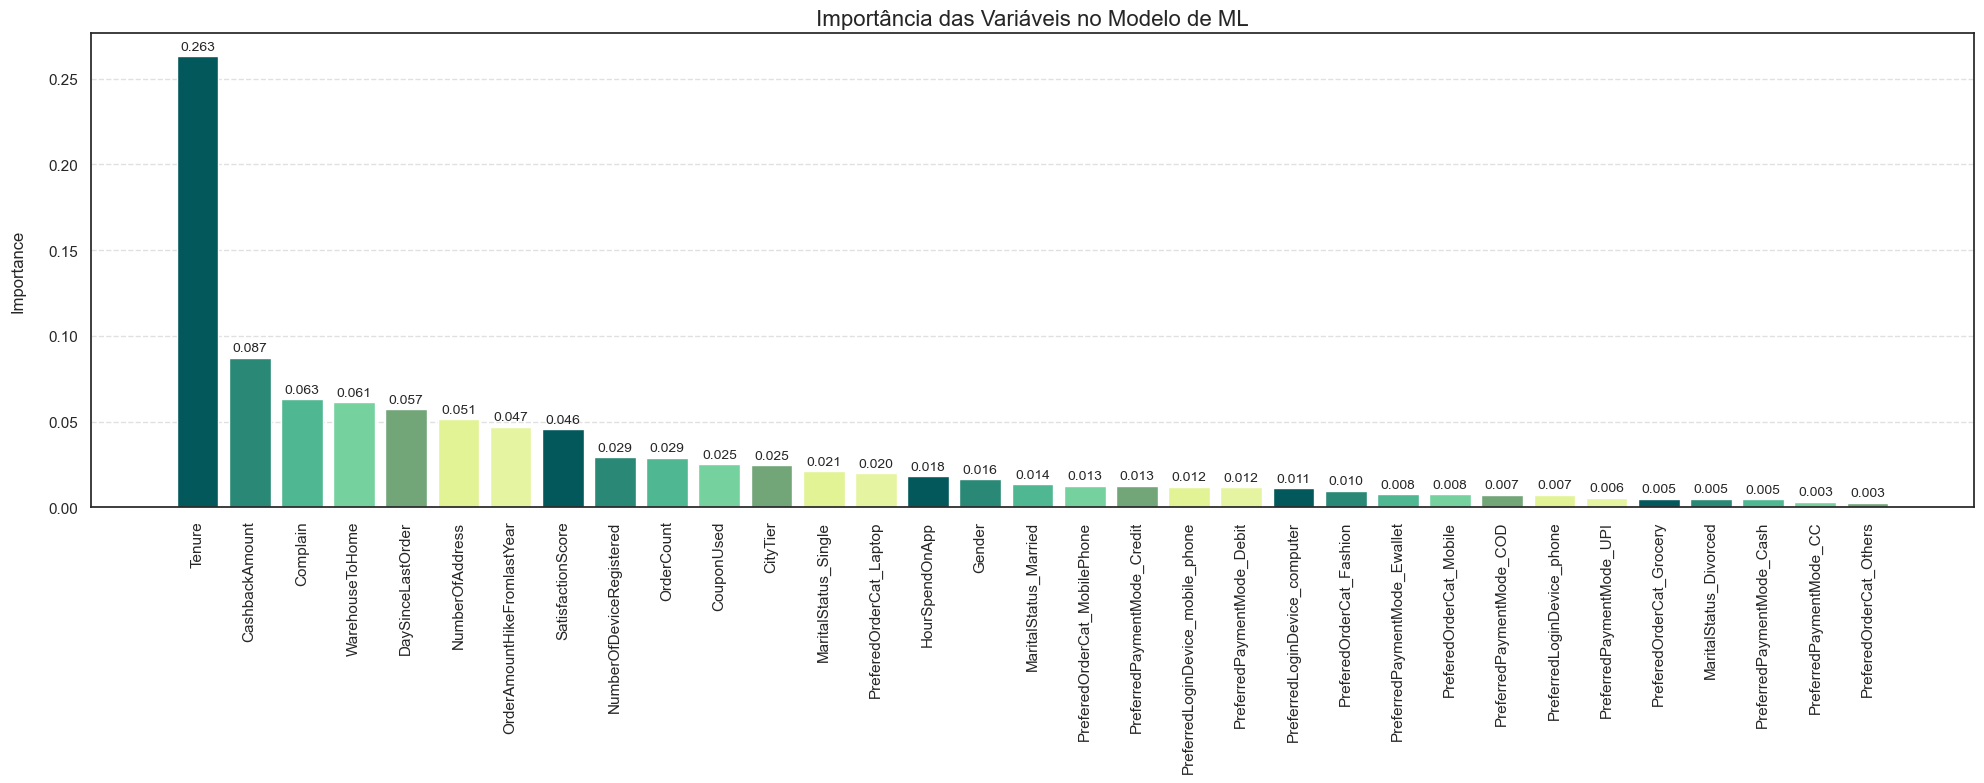

In [297]:
import os

# Criar diretório se necessário
caminho_pasta = 'C:\\Users\\Ana Beatriz Soares\\CursosML_Classificação\\imagens'
os.makedirs(caminho_pasta, exist_ok=True)
caminho_arquivo = os.path.join(caminho_pasta, 'feature_importance.png')

# Feature Importance
feature_importances = pd.DataFrame(
    rf.feature_importances_,
    index=x_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Paleta do dashboard
cores = ['#02585A', '#298876', '#4FB791', '#75D19E', '#72A678', '#E2F396', '#E5F4A0']
colors_cicladas = [cores[i % len(cores)] for i in range(len(feature_importances))]

# Gráfico com rótulos
plt.figure(figsize=(20, 8))
bars = plt.bar(feature_importances.index, feature_importances['importance'], color=colors_cicladas)
plt.xticks(rotation=90)
plt.ylabel('Importance\n')
plt.title('Importância das Variáveis no Modelo de ML', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adiciona rótulo acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(caminho_arquivo, dpi=300, bbox_inches='tight')
plt.show()


# Random Forest

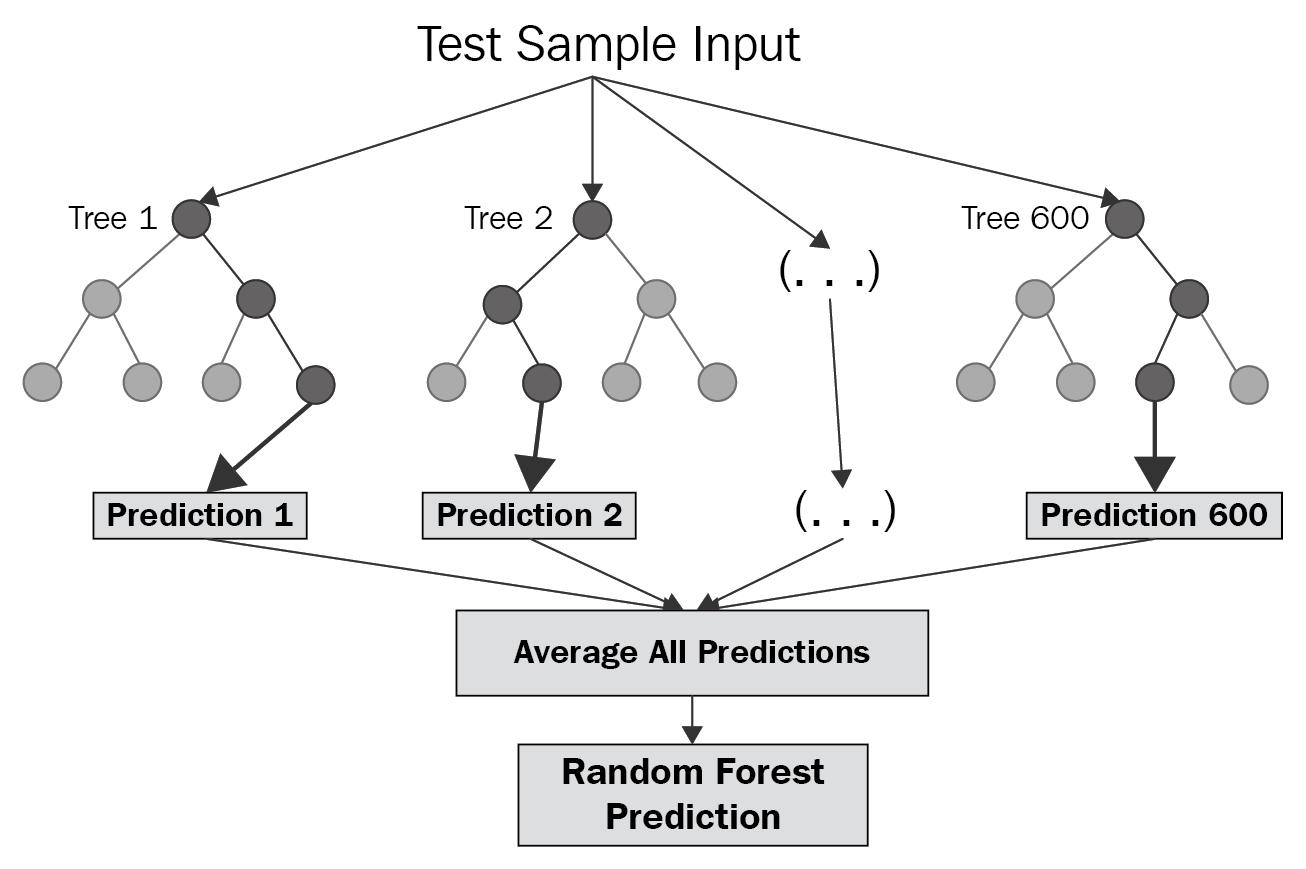

In [299]:
Image('arvore.png')

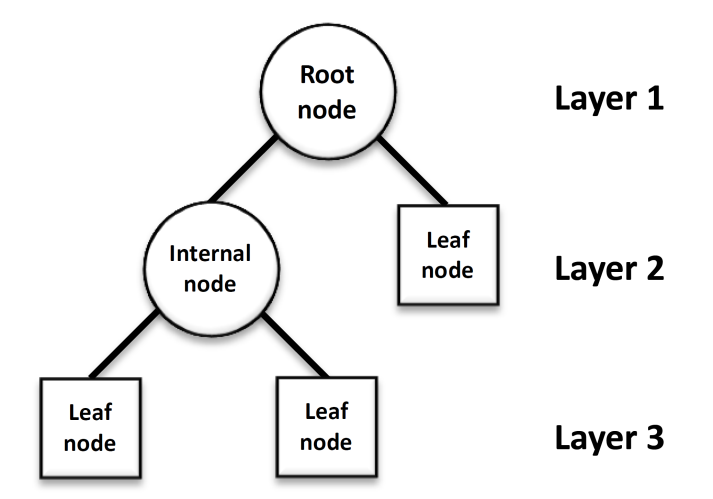

In [301]:
Image('arvore_2.png')

In [302]:
y_predicted = rf.predict(np.array(x_test))

In [304]:
y_predicted

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [305]:
metrics = pd.DataFrame({'Predicted': y_predicted, 'Real': y_test['Churn']})

In [306]:
metrics

,Predicted,Real
2347,0,0
318,1,1
1812,0,0
2136,1,1
2605,0,0
...,...,...
3873,0,0
3768,0,0
4887,0,0
732,1,1


In [308]:
metrics[metrics['Predicted'] == metrics['Real']].shape[0]/metrics.shape[0]

0.9520426287744227

In [309]:
accuracy_score(y_test, y_predicted)

0.9520426287744227

# Confusion Matrix

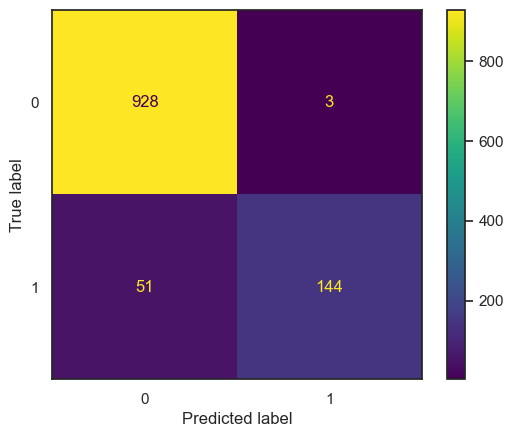

In [311]:
ConfusionMatrixDisplay.from_estimator(rf, np.array(x_test), np.array(y_test['Churn']))
plt.show()

In [326]:
# É não churn e previu como não churn mesmo

928/(928+3)

0.9967776584317938

In [328]:
# É churn e previu como churn

144/(144+51)

0.7384615384615385

# Otimização de Hiper-parâmetros

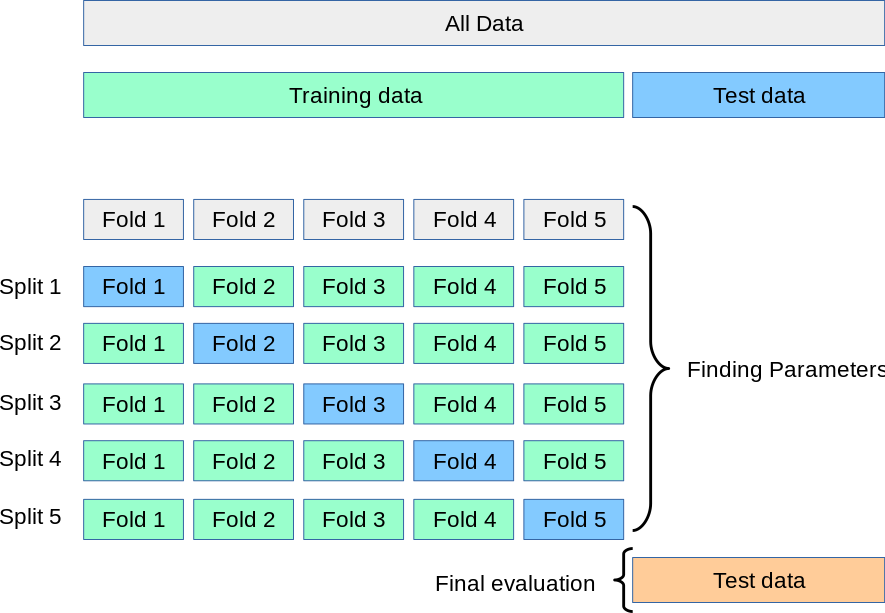

In [331]:
Image('cross+validation.png')

In [568]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [575]:
rf_test = {"max_depth": [5,10,15],
           "max_features": [2,4,6,8],
           "min_samples_split": [2,3,4],
           "min_samples_leaf": [1,2,3],
           "n_estimators" :[50,100,150,200],
           "criterion": ["gini","entropy"]}

tuning = GridSearchCV(estimator = RandomForestClassifier(class_weight="balanced"), 
                      param_grid = rf_test, 
                      scoring = 'accuracy', 
                      cv = 4, 
                      verbose=5)

tuning.fit(np.array(x_train), np.array(y_train['Churn']))

rf_best = tuning.best_estimator_

tuning.best_score_

Fitting 4 folds for each of 864 candidates, totalling 3456 fits
[CV 1/4] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.845 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.845 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.849 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.856 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.846 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=5, max_

KeyboardInterrupt: 